<a href="https://colab.research.google.com/github/Elcejas77/Ejercicios/blob/main/ArboledaDiego_Parcial2_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 2-Señales y sistemas 2023

DIEGO ALEJANDRO ARBOLEDA CUERO
CC:1087834596

#Punto 1 parte teorica
Adjunto link a la parte teorica de la solucion del parcial,adicionalmente esta se puede encontrar en el repositorio de github  "Ejercicios"

link : https://github.com/Elcejas77/Ejercicios/blob/b4d095b1cc9f0e6a8170134addda78cc3878da46/Parte_Teorica_parcial_2_se%C3%B1ales.pdf

# PUNTO 1-CODIGO
NOTA:ALgunos de los calculos que se utilizaron para la creacion de este codigo se encuentran en el pdf que contiene la solucion teorica.

wo= 1.0
Fo= 1.5707963267948966


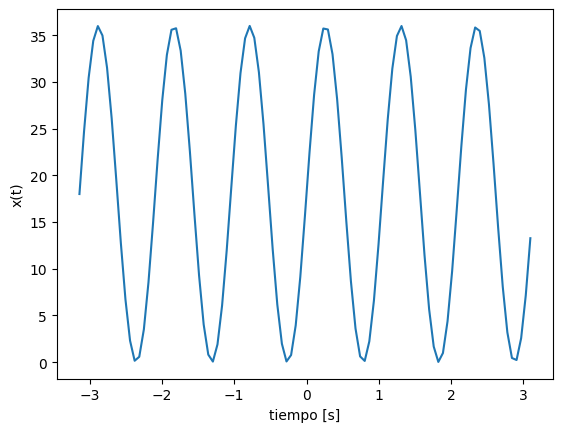

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#como primer paso creamos y graficamos la señal que utilizaremos en este ejercicio
ti = -np.pi #tiempo inicial
tf = np.pi #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 10*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo

x = abs(6*np.sin(3*tv+np.pi/4))**2 #señal de entrada
plt.plot(tv,x) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('x(t)')
plt.show()

Creamos las bases para la serie exponencial compleja de fourier,definiendo los valores a utilizar para el ejercio,desde el numero de armonicos hasta el intervalo de interes para el problema

In [19]:
T = tf - ti #intervalo de interés
N = 10 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

Graficamos las bases de interes para el ejercicio

In [20]:
from ipywidgets import interact,IntSlider

def pltbase(n=1):
    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=10, min=-10), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

calculamos el espectro de la señal,los valores de cn se calcularon manualmente y estan definidos en la parte teorica de este punto

In [21]:
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector armónicos
cn[N] = 18 # nivel dc C_0
cn[N-6] = +9j #armónico -6
cn[N+6] = -9j #armónico +6

Graficamos el espectro con los valores que dimos anteriormente

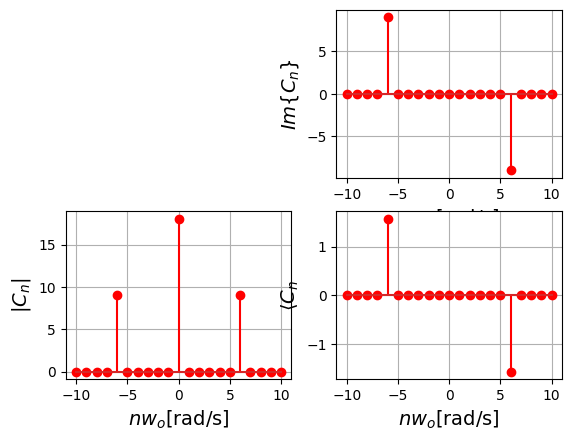

In [22]:
#graficar espectro
#fig = plt.figure(figsize=(8,8))
#plt.subplot(2,2,1)
#plt.stem(nv, np.real(cn), 'r')
#plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
#plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
#plt.axis('tight')
#plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

Graficamos la reconstruccion ,y a su vez tenemos en cuenta el calculo del error relativo respecto a la cantidad de armonicos y el error relativo que se presenta. La potencia de la señal de calculo manualmente y se encuentra en el documento de la teoria del ejercicio

In [24]:
Px = 486 # potencia señal x(t)
def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- np.sum(abs(cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='r',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='y',label='$x(t)$') #señal original
    plt.title('E_r=%.2f[%%]' % (100*er),fontsize=10)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=10, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

# Punto 2


Empezamos definiendo la señal portadora y el mensaje para nuestro ejercicio,con ello la amplitud, y frecuencias necesarias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Fc = 200000 #frecuencia de portadora

Fm = 48000 #frecuencia del mensaje
Am = 3 #amplitud del mensaje


ti = 0
tf = 10/Fm #cantidad de periodos a graficar de la

Fs = 10*Fc #frecuencia muestreo

t = np.arange(ti,tf,1/Fs) #vector del tiempo
m = Am*np.cos(2*np.pi*Fm*t) #mensaje

Im = 1 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im

Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*t) #portadora
print(Ac)

3.0


Pintamos las señales definidas anteriormente

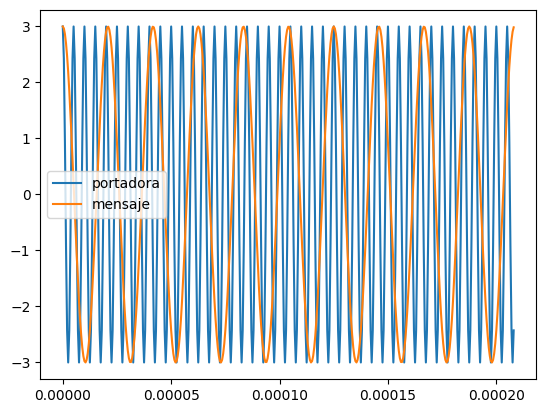

In [ ]:
plt.plot(t,c,label='portadora')
plt.plot(t,m,label='mensaje')
plt.legend()
plt.show()

definimos la señal a modular

In [ ]:
y = (1+m/Ac)*c #señal modulada en AM

Pintamos la señal modulada

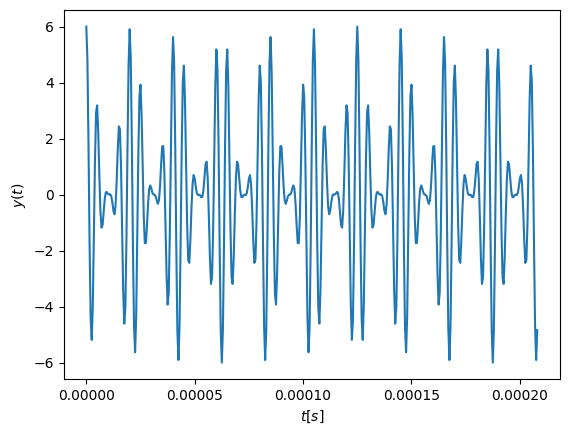

In [ ]:
plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

encontramosy pintamos el espectro para la señal modulada,la portadora y el mensaje

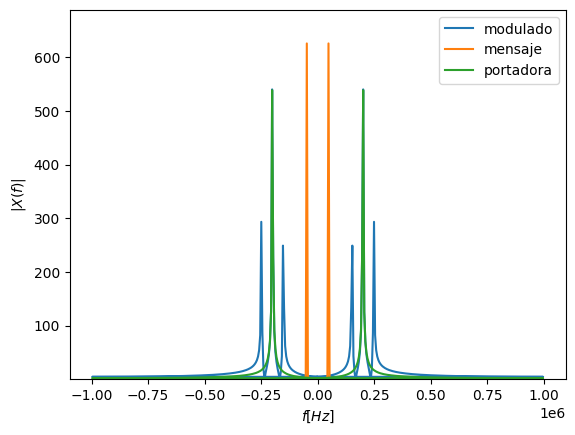

In [ ]:
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

Para la 2da parte del ejercicio necesitamos instalar algunas cosas para poder descargar y manipular de una forma mas eficaz la cancion que descargaremos desde you tube

In [ ]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 20.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 6.3 MB/s eta 0:00:00
  Created wh

A continuacion esta el codigo para descargar la cancion de you tube y transformarla a un formato con el cual manipularla facilmente ,con solo poner el link de esta

In [ ]:
link="https://www.youtube.com/watch?v=OesXvuWhDnw"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}
!ffmpeg -y -i audio.mp3 output.wav
!pip install soundfile
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

[youtube] Extracting URL: https://www.youtube.com/watch?v=OesXvuWhDnw
[youtube] OesXvuWhDnw: Downloading webpage
[youtube] OesXvuWhDnw: Downloading ios player API JSON
[youtube] OesXvuWhDnw: Downloading android player API JSON
[youtube] OesXvuWhDnw: Downloading m3u8 information
[info] OesXvuWhDnw: Downloading 1 format(s): 251
[download] Destination: audio
[download] 100% of    5.13MiB in 00:00:00 at 36.51MiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file audio (pass -k to keep)
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libd

obtenemos del segundo 20 al 25 como lo requiere el ejercicio y lo graficamos

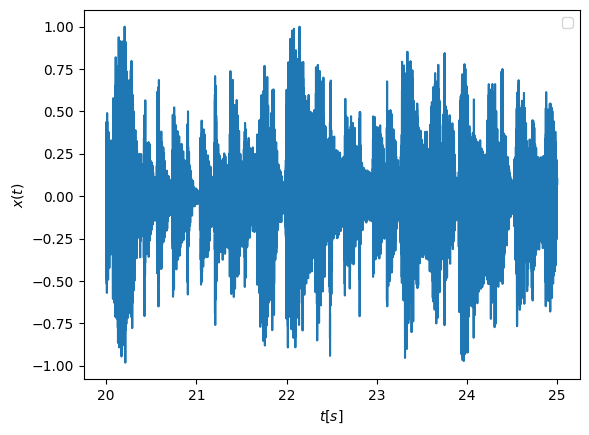

In [ ]:
xpro = x.copy() #copiar archivos para procesar
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
xs = xpro[int(ti*fs):int((tf*fs)):,0]
tt = np.arange(ti,tf,1/fs) # vector de tiempo # Recorta xs para que tenga la misma longitud que tt
plt.plot(tt,xs)
plt.legend(('canal 1'))
plt.xlabel('$t[s]$')
plt.ylabel('$x(t)$')
plt.legend()
plt.show()

Encontramos el espectro de la señal de audio original

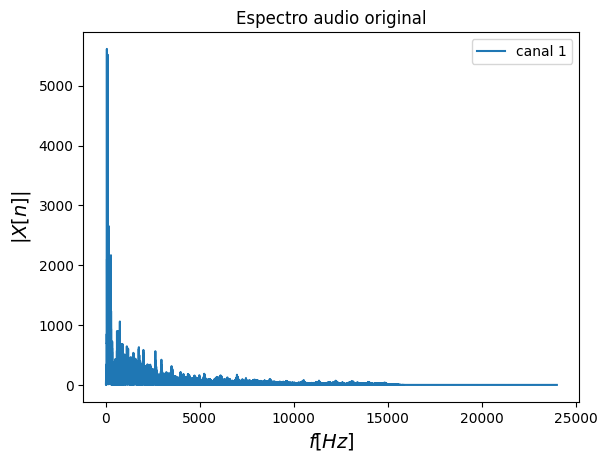

In [ ]:
Xwc1 = np.fft.rfft(xs)
#Xwc2 = np.fft.rfft(xs[:,1])
vf = np.fft.rfftfreq(np.size(xs,0),1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Xwc1))#se grafica la magnitud
plt.legend(('canal 1','canal 2'))
plt.title(r'Espectro audio original')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.show()

Definimos los parametros para empezar la modulacion y graficamos la señal portadora y el mensaje

0.999969482421875


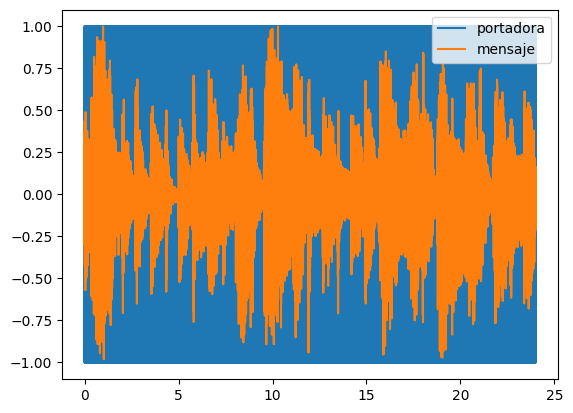

In [ ]:
Fc = 1000 #frecuencia de portadora
Fm = 100 #frecuencia del mensaje
Am = 3 #amplitud del mensaje
ti1 = 0
Fs = 10*Fc #frecuencia muestreo
m1 = xs
tf1 = len(m1) / Fs
Im = 1 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
t = np.arange(ti1, tf1, 1/Fs)
Ac = max(abs(m1))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*t) #portadora
print(Ac)
plt.plot(t,c,label='portadora')
plt.plot(t,m1,label='mensaje')
plt.legend()
plt.show()

Modulamos la señal y graficamos la señal ya modulada

In [ ]:
y1 = (1+m1/Ac)*c #señal modulada en AM

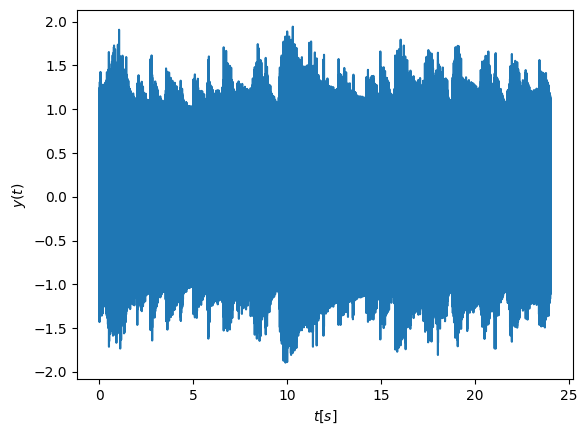

In [ ]:
plt.plot(t,y1)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

a continuacion presentamos las señales de audio distintas,la portadora,la portadora y el mensaje,y la señal ya modulada

señal portadora

In [ ]:
from IPython.display import Audio
fs1=200
Audio(c[:int(fs1*5000)].T,rate=fs)#repoducir señal filtrada


portadora y mensaje

In [ ]:
xe1 = np.fft.irfft(m1,axis=0)
xe2 = np.fft.irfft(y1,axis=0)
Audio(y1[:int(fs1*5000)].T,rate=fs)#repoducir señal filtrada


la señal ya filtrada

In [ ]:
Audio(xs[:int(fs1*5000)].T,rate=fs)#repoducir señal filtrada

y para finalizar graficamos el espectro para cada una de las señales,mensaje,portadora y la modulada

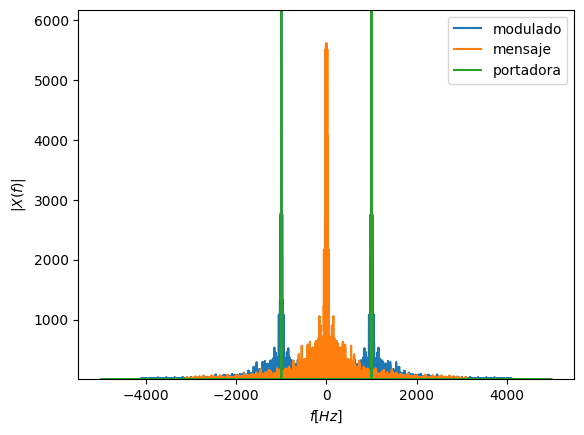

In [ ]:
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m1)
Xfy = np.fft.fft(y1)

vfre = np.fft.fftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

#Punto 3
para evitar cualquier tipo de inconveniente o problema entre las partes del codigo y archivos,adjunto link del punto 3 que se realizo en un documento aparte.
https://github.com/Elcejas77/Ejercicios/blob/5b16304060087a24e08c968373bfcaf534ce1cec/Parcial2_Punto3_ArboledaDiego.ipynb